<h1 align="center">Regarding plot summaries</h1>

<h2 align="center">In this notebook, we will present our idea on one plot summary (Movie ID = 23890098) in order to give examples. We will apply the same ideas to all the summaries (present in the plot_summaries.txt)</h2>


### The exercise here is to use the movies plot summaries in order to find a relationship or an insight leading us to the financial success of a movie. The problem is to try to identify which kind of plotline maximizes revenue.

A first idea, (which is more like a flex I have to agree) was to visualize the most common words in the format of clouds of words. This turned to be useful because it made us realize that the most common words were often the names. (As you can see on the code below when we updated the stopwords, adding the names of the characters).

By the way, trying this method at first made us realize that character names are really common in summaries. One way we used to deal with that, is that, as you will see in the continuity of the 'problem', we also got rid of words starting with an uppercase letter (when converting our text to a list of the words).

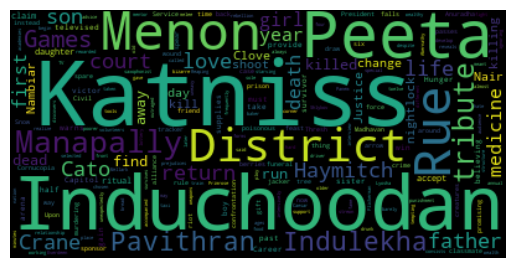

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#STOPWORDS.update({"Peeta", "Haymitch", "Cato", "Katniss", "Menon", "Rue", "District", "tribute", "Manapally", "Indulekha", "Pavithran"})
#"Induchoodan"
# read text from file and store in a variable
with open("/Users/reds/Desktop/essai.txt") as file:
    data = file.read()

# create wordcloud using data
wordcloud = WordCloud().generate(data)

# show wordcloud using matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As you can imagine, the idea above is not useful..
Another idea was to only consider the words with the highest frequency. This poses a problem as to how to define a "high frequency". In some texts we could find that a high frequency would mean that a word is present more than 4 times, while in other texts it could be only more that 2 times... which already poses a problem, if we want to generalize it.
As you can see below an example where we only kept words which appeared 3 or more times in the summary.

In [19]:
import re
 
frequency = {}
document_text = open('/Users/reds/Desktop/essai.txt', 'r')
text_string = document_text.read()#.lower()
match_pattern = re.findall(r"[\w']+", text_string)
match_pattern = [m for m in match_pattern if not m.istitle()]
match_pattern = [m for m in match_pattern if not m.isdigit()]

for word in match_pattern:
    if word in stop_words:
        continue
    count = frequency.get(word,0)
    frequency[word] = count + 1
    
x = []
y = []
frequency_list = frequency.keys()
# frequency of words
for words in frequency_list:
    if(frequency[words] > 2):
        x.append(words)
        y.append(frequency[words])
        print(words, frequency[words])

love 4
girl 3
tributes 4
death 3
first 3
son 4
tribute 3
medicine 3
killed 3
away 3
dead 3
killing 3
nightlock 3
life 4
daughter 3
returns 3
father 4
court 4


We then had this idea of making that bar plot to highlight the most frequent words:

In [20]:
print('x = ', x)
print('y = ', y)

x =  ['love', 'girl', 'tributes', 'death', 'first', 'son', 'tribute', 'medicine', 'killed', 'away', 'dead', 'killing', 'nightlock', 'life', 'daughter', 'returns', 'father', 'court']
y =  [4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4]


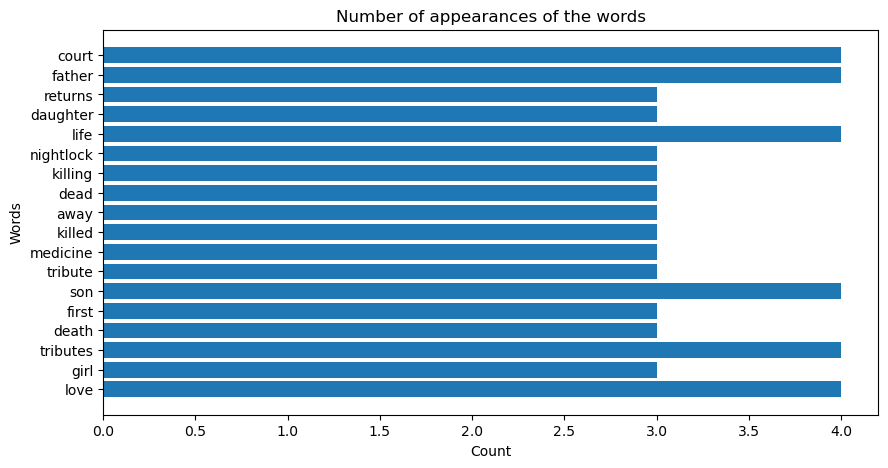

In [21]:
plt.figure(figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Number of appearances of the words')
p = plt.barh(x,y)
#p.invert_yaxis()
#sns.countplot(data=df, y=x)

### Final idea:

Remember that the goal here is to try to determine whether the text is positive, negative, or neutral.
Referring to HW1, we thought of using the english lexicon summary, using positive-words.txt and negative-words.txt files. After thorough research on the internet and trying a few libraries, this turned out to be more complete one.

In [22]:
negative = pd.read_csv('/Users/reds/Desktop/negative-words.txt',encoding_errors='ignore',delimiter='\t',header=None,skiprows=30,names=['words'])
positive = pd.read_csv('/Users/reds/Desktop/positive-words.txt',encoding_errors='ignore',delimiter='\t',header=None,skiprows=30,names=['words'])
negative_list = negative.stack().tolist()
positive_list = positive.stack().tolist()

We therefore perform an intersection between the list of positive (resp. negative) words and the list of words of our summary.

In [23]:
len_neg = len(list(set(frequency_list) & set(negative_list)))
len_pos = len(list(set(frequency_list) & set(positive_list)))
len_total = len(frequency_list)
print("Number of positive words:", len_neg)
print("Number of negative words:", len_pos)
print("Number of words:", len_total)

Number of positive words: 53
Number of negative words: 24
Number of words: 447


We now want to find a metric to determine if it is positive, negative, or neutral, what we would call our "sentiment score":
- Method 1: Calculate absolute score by using positive count-negative count
    ##### $$ Degree = number(positive) - number(negative) $$
    This is a direct and simple calculation of how positive/negative the review is. The advantage is that it is straightforward and simple to understand. However, the score may favor longer reviews because they tend to have more counts of positive/negative words even they have the same sentiment.
- #### Our method : Normalise the score by the length of the summary:
    ##### $$ Degree = \frac{number(positive) - number(negative)}{number(words)} $$
    This gives us a result between -1 and 1.

In [24]:
# Calculation of frequency:
# Degree of p/n = (pos - neg)/total_words
degree = (len_pos-len_neg)/len_total
print("degree =", degree)

degree = -0.06487695749440715


Once we have this degree of positivity / negativity for each plot summary. We will find a correlation with the profit of the movie in order to determine what kind of "emotion" would most likely lead to a successful movie. In other terms, what is the most common emotion in financially successful movies.

<h1 align="center">Plot summaries for all movies: </h1>

First of all, here is the final dataset that we work with:

In [313]:
df_total = pd.read_csv("/Users/reds/Desktop/df_with_rating.csv")
df_total

,Unnamed: 0,Imdb_id,Freebase movie ID,Movie name,Movie release date,release_year,movie_runtime,movie_genres,MBO_revenue,budget,average_rating,num_votes,profit,weighted_rating,mult_profit
0,0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001.0,97.0,"['Thriller', 'Crime Thriller', 'Horror', 'Psyc...",4.511683e+07,2.831896e+07,6.6,70424.0,1.679787e+07,6.397055,1.593167
1,1,tt0117571,/m/0sy44,Scream,1996-12-18,1996.0,103.0,"['Crime Fiction', 'Mystery', 'Horror']",2.404963e+08,1.945688e+07,7.4,344034.0,2.210394e+08,7.116556,12.360476
2,2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002.0,133.0,"['Thriller', 'Glamorized Spy Film', 'Action', ...",5.236253e+08,1.721176e+08,6.1,220386.0,3.515077e+08,6.159714,3.042254
3,3,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010.0,104.0,"['Drama', 'Indie']",4.882577e+06,1.500000e+07,6.7,46022.0,-1.011742e+07,6.394890,0.325505
4,4,tt1375666,/m/0661ql3,Inception,2010-07-08,2010.0,148.0,"['Thriller', 'Science Fiction', 'Adventure', '...",2.925873e+08,1.600000e+08,8.8,2334604.0,1.325873e+08,8.680734,1.828671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,3371,tt0174204,/m/05m__6g,Simpatico,1999,1999.0,106.0,"['Crime Fiction', 'Drama', 'Indie', 'World cin...",1.216724e+06,1.308860e+07,4.7,3626.0,-1.187187e+07,6.225649,0.092961
3372,3372,tt0081758,/m/080b_yp,Willie & Phil,1980,1980.0,115.0,"['Romance Film', 'Drama', 'Comedy']",1.164377e+07,1.455471e+07,5.9,492.0,-2.910942e+06,6.271904,0.800000
3373,3373,tt0285869,/m/0282l0j,Trois 2: Pandora's Box,2002,2002.0,104.0,"['Thriller', 'Erotic thriller', 'Psychological...",1.010620e+06,9.696765e+05,4.7,733.0,4.094338e+04,6.263567,1.042224
3374,3374,tt0119578,/m/04ctwyf,Love! Valour! Compassion!,1997-01-25,1997.0,108.0,"['LGBT', 'Indie', 'Drama', 'Comedy', 'Gay Them...",3.939953e+06,2.717209e+06,7.0,3589.0,1.222744e+06,6.295360,1.450000


Here is the dataset for the plot summaries:

In [314]:
colnames=["Wikipedia Movie ID","Summary"]
df_plot=pd.read_csv('/Users/reds/Desktop/Proj/MovieSummaries/plot_summaries.txt',names=colnames, sep="\t")
df_plot

,Wikipedia Movie ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


I know there are a few (very few) duplicates but not an issue for the moment

### Algorithm to compute emotion degree for a summary:

Quick parenthesis: at first I computed the degree as 

 $$ Degree = \frac{number(positive) - number(negative)}{number(words)} $$
 
  but when working with the data, I would only have degrees between -0.5 and 0.5.
  
I therefore decided to use a new formula : 

 $$ Degree = \frac{number(positive) - number(negative)}{number(positive) + number(negative)} $$
 
in order to only consider the words that are 'relevant', this allowed me to have degrees between -1 and 1, as wanted at first.

In [317]:
def compute_deg(text_string):
    frequency = {}
    
    match_pattern = re.findall(r"[\w']+", text_string)
    match_pattern = [m for m in match_pattern if not m.istitle()]
    match_pattern = [m for m in match_pattern if not m.isdigit()]

    for word in match_pattern:
        if word in stop_words:
            continue
        count = frequency.get(word,0)
        frequency[word] = count + 1

    frequency_list = frequency.keys()
    len_neg = len(list(set(frequency_list) & set(negative_list)))
    len_pos = len(list(set(frequency_list) & set(positive_list)))
    len_total = len(frequency_list)
    
    lenn = len_pos+len_neg
    if(lenn==0):
        degree = 0
    else:
        #degree = (len_pos-len_neg)/len_total
        degree = (len_pos-len_neg)/(lenn)
    
    return degree

Now let's apply our algorithm on the summary dataset:

In [318]:
list_scores = []
for index in range(0, len(df_plot)):
    score = compute_deg(df_plot['Summary'][index])
    list_scores.append(score)

In [319]:
# Check the length of the list is the length of the dataframe
len(list_scores)

42303

Add the Sentiment score column to the dataframe:

In [320]:
df_plot["Sentiment"]=list_scores

In [321]:
df_plot

,Wikipedia Movie ID,Summary,Sentiment
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",-0.600000
1,31186339,The nation of Panem consists of a wealthy Capi...,-0.347826
2,20663735,Poovalli Induchoodan is sentenced for six yea...,-0.393939
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",-0.105263
4,595909,Seventh-day Adventist Church pastor Michael Ch...,-0.529412
...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",0.000000
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",-0.428571
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,1.000000
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",-0.333333


In [322]:
print("min =", min(df_plot["Sentiment"]), ", max =", min(df_plot["Sentiment"]))

min = -1.0 , max = -1.0


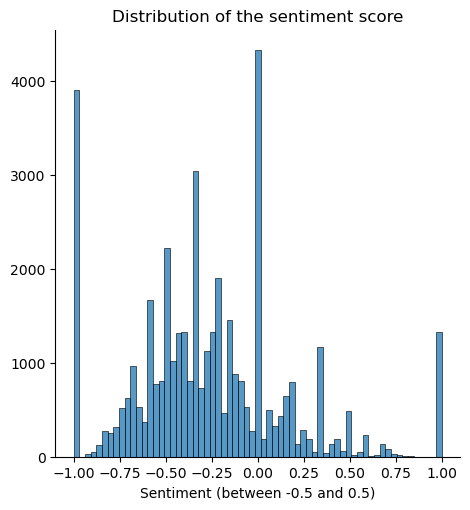

In [323]:
sns.displot(df_plot, x="Sentiment").set(title='Distribution of the sentiment score', ylabel="", xlabel="Sentiment (between -0.5 and 0.5)")

Trying to remove the movies for which sentiment = 0, to have a "more beautiful" distribution : 

In [324]:
df_nonzero=df_plot[df_plot["Sentiment"]!=0]
df_nonzero

,Wikipedia Movie ID,Summary,Sentiment
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",-0.600000
1,31186339,The nation of Panem consists of a wealthy Capi...,-0.347826
2,20663735,Poovalli Induchoodan is sentenced for six yea...,-0.393939
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",-0.105263
4,595909,Seventh-day Adventist Church pastor Michael Ch...,-0.529412
...,...,...,...
42297,2867597,"An attempt to bring the famed ""Mr. Bill"" clay ...",0.200000
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",-0.428571
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,1.000000
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",-0.333333


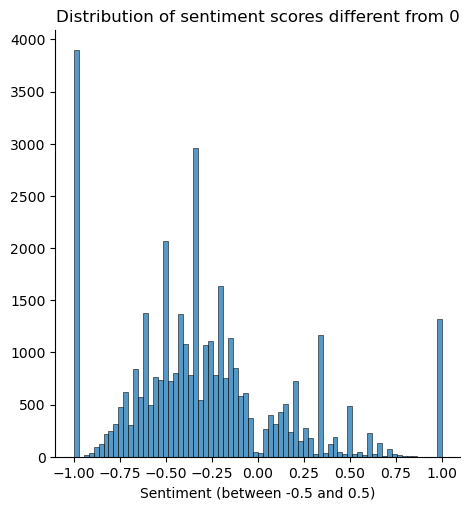

In [325]:
sns.displot(df_nonzero, x="Sentiment").set(title='Distribution of sentiment scores different from 0', ylabel="", xlabel="Sentiment (between -0.5 and 0.5)")

In order to merge our datasets, we need to find the movies' names, because the final dataframe 'df_total' doesn't have them.

In [326]:
colnames=["Wikipedia movie ID","Freebase movie ID","Movie name","Movie release date","Movie box office revenue","Movie runtime","Movie languages","Movie countries","Movie genres"]
df_movies=pd.read_csv('./MovieSummaries/movie.metadata.tsv', sep="\t", names = colnames)
keep_cols=["Wikipedia movie ID","Movie name"]
df_movies=df_movies[keep_cols]
df_movies

,Wikipedia movie ID,Movie name
0,975900,Ghosts of Mars
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...
2,28463795,Brun bitter
3,9363483,White Of The Eye
4,261236,A Woman in Flames
...,...,...
81736,35228177,Mermaids: The Body Found
81737,34980460,Knuckle
81738,9971909,Another Nice Mess
81739,913762,The Super Dimension Fortress Macross II: Lover...


In [327]:
#Rename "Wikipedia movie ID" to "Wikipedia Movie ID" in order to be able to merge
df_movies=df_movies.rename(columns={"Wikipedia movie ID": "Wikipedia Movie ID"})

In [328]:
merge=pd.merge(df_plot, df_movies, on="Wikipedia Movie ID")
merge

,Wikipedia Movie ID,Summary,Sentiment,Movie name
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",-0.600000,Taxi Blues
1,31186339,The nation of Panem consists of a wealthy Capi...,-0.347826,The Hunger Games
2,20663735,Poovalli Induchoodan is sentenced for six yea...,-0.393939,Narasimham
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",-0.105263,The Lemon Drop Kid
4,595909,Seventh-day Adventist Church pastor Michael Ch...,-0.529412,A Cry in the Dark
...,...,...,...,...
42199,34808485,"The story is about Reema , a young Muslim scho...",0.000000,Oomakkuyil Padumbol
42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",-0.428571,The Last Command
42201,35102018,American Luthier focuses on Randy Parsons’ tra...,1.000000,Randy Parsons: American Luthier
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",-0.333333,Kabuliwala


In [329]:
# Only keep the columns that we need
merge = merge[['Sentiment', 'Movie name']]
merge

,Sentiment,Movie name
0,-0.600000,Taxi Blues
1,-0.347826,The Hunger Games
2,-0.393939,Narasimham
3,-0.105263,The Lemon Drop Kid
4,-0.529412,A Cry in the Dark
...,...,...
42199,0.000000,Oomakkuyil Padumbol
42200,-0.428571,The Last Command
42201,1.000000,Randy Parsons: American Luthier
42202,-0.333333,Kabuliwala


In [330]:
# Now we can take care of dropping the duplicates
merge=merge.drop_duplicates(['Movie name'], ignore_index=True)
merge

,Sentiment,Movie name
0,-0.600000,Taxi Blues
1,-0.347826,The Hunger Games
2,-0.393939,Narasimham
3,-0.105263,The Lemon Drop Kid
4,-0.529412,A Cry in the Dark
...,...,...
39909,0.200000,Mr. Bill's Real Life Adventures
39910,0.000000,Oomakkuyil Padumbol
39911,-0.428571,The Last Command
39912,1.000000,Randy Parsons: American Luthier


Now let's merge with the complete dataframe, to give to each movie studid its sentiment score as well.

In [331]:
df_with_score = pd.merge(df_total, merge, on="Movie name")
df_with_score

,Unnamed: 0,Imdb_id,Freebase movie ID,Movie name,Movie release date,release_year,movie_runtime,movie_genres,MBO_revenue,budget,average_rating,num_votes,profit,weighted_rating,mult_profit,Sentiment
0,0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001.0,97.0,"['Thriller', 'Crime Thriller', 'Horror', 'Psyc...",4.511683e+07,2.831896e+07,6.6,70424.0,1.679787e+07,6.397055,1.593167,-0.446809
1,1,tt0117571,/m/0sy44,Scream,1996-12-18,1996.0,103.0,"['Crime Fiction', 'Mystery', 'Horror']",2.404963e+08,1.945688e+07,7.4,344034.0,2.210394e+08,7.116556,12.360476,-0.562500
2,2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002.0,133.0,"['Thriller', 'Glamorized Spy Film', 'Action', ...",5.236253e+08,1.721176e+08,6.1,220386.0,3.515077e+08,6.159714,3.042254,-0.866667
3,3,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010.0,104.0,"['Drama', 'Indie']",4.882577e+06,1.500000e+07,6.7,46022.0,-1.011742e+07,6.394890,0.325505,-0.375000
4,4,tt1375666,/m/0661ql3,Inception,2010-07-08,2010.0,148.0,"['Thriller', 'Science Fiction', 'Adventure', '...",2.925873e+08,1.600000e+08,8.8,2334604.0,1.325873e+08,8.680734,1.828671,-0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,3371,tt0174204,/m/05m__6g,Simpatico,1999,1999.0,106.0,"['Crime Fiction', 'Drama', 'Indie', 'World cin...",1.216724e+06,1.308860e+07,4.7,3626.0,-1.187187e+07,6.225649,0.092961,0.111111
3225,3372,tt0081758,/m/080b_yp,Willie & Phil,1980,1980.0,115.0,"['Romance Film', 'Drama', 'Comedy']",1.164377e+07,1.455471e+07,5.9,492.0,-2.910942e+06,6.271904,0.800000,0.333333
3226,3373,tt0285869,/m/0282l0j,Trois 2: Pandora's Box,2002,2002.0,104.0,"['Thriller', 'Erotic thriller', 'Psychological...",1.010620e+06,9.696765e+05,4.7,733.0,4.094338e+04,6.263567,1.042224,0.000000
3227,3374,tt0119578,/m/04ctwyf,Love! Valour! Compassion!,1997-01-25,1997.0,108.0,"['LGBT', 'Indie', 'Drama', 'Comedy', 'Gay Them...",3.939953e+06,2.717209e+06,7.0,3589.0,1.222744e+06,6.295360,1.450000,-0.375000


### Interpretation of result with 'financial success':

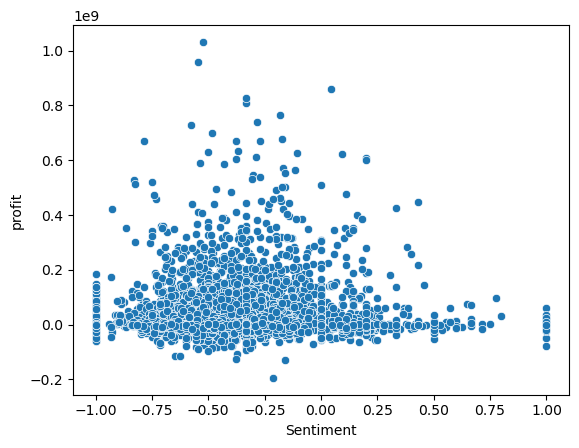

In [386]:
sns.scatterplot(x='Sentiment', y='profit', data=df_with_score)
plt.show()

As we can already see from the plot, it might be difficult to establish a relationship between the sentiment score and the financial success of a movie.

We can try to compute a few statistical tests:

In [394]:
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [395]:
pear_corr, _ = pearsonr(df_with_score['profit'], df_with_score['Sentiment'])
print(f'Pearson correlation coefficient: {pear_corr}')

sp_corr, _ = spearmanr(df_with_score['profit'], df_with_score['Sentiment'])
print(f'Spearman rank correlation coefficient: {sp_corr}')

kt_corr, _ = kendalltau(df_with_score['profit'], df_with_score['Sentiment'])
print(f"Kendall's tau: {kt_corr}")

Pearson correlation coefficient: -0.015601365891068815
Spearman rank correlation coefficient: -0.017146765753914273
Kendall's tau: -0.011589666860863468


A Pearson correlation coefficient of -0.15, Spearman rank correlation coefficient of -0.017 and Kendall's tau of -0.011 indicates a very weak negative relationship between the two variables. This means that as the sentiment score decreases, the profit tends to increase slightly (and vice versa), but the relationship is not very strong.

Given that these values can range from -1 to 1, where -1 represents a perfect negative relationship, 0 represents no relationship, and 1 represents a perfect positive relationship. The numbers obtained are relatively weak compared to these other possibilities.

It's important to note that correlation does not imply causation.

We could suggest a very small impact of a negative sentiment score on the profit of a movie, stating that the more negative a movie (plot summary) will be, the more financial success it will gain. However, I would take precautions with this statement and suggest the idea that our negative coefficients are mainly due to the fact that the majority of sentiment scores on the dataframe are originally negative, impacting the resulting coefficient.